# Projeto 1 - Ciência dos Dados

Nome: Ivan de Alcântara Barbosa Barros

Nome: Jamesson Leandro Paiva Santos

**Atenção:** Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

**Em `filename`, coloque o nome do seu arquivo de dados!**

In [2]:
import os

filename = 'guarana_jesus.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com a prova!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo guarana_jesus.xlsx, tudo certo para prosseguir com a prova!


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
# Dados de treino
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Classificação
0,rt @giussilvestre: os éguas que tão cancelando...,0
1,@whindersson @lilwhind guaraná jesus... show d...,1
2,bissexuais tomando guarana jesus,0
3,@whindersson @lilwhind guaraná jesus é tipo al...,0
4,rt @maickjhonn: piaui nem tem guaraná jesus is...,0


In [4]:
# Dados de teste
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Classificação
0,foda que ela é coca-cola e eu guaraná jesus😫,1
1,@niyeongs @tealcookie eu gostei de pernambuco ...,0
2,rt @botbissexual: bissexuais tomando guarana j...,0
3,a bandeira do estado do cara parece mais uma l...,0
4,rt @marilhera: @inesteticas cajuína meets guar...,0


In [5]:
# Separando dados de acordo com a classificação dada
serie_0 = train[train["Classificação"] == 0]
serie_1 = train[train["Classificação"] == 1]

series = [serie_0, serie_1]

# Transforma em lista de strings as séries acima
str(list(series[0]["Treinamento"].values))
str(list(series[1]["Treinamento"].values))
print('Ok')

Ok


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

### Produto escolhido: <em>Guaraná Jesus</em>

O produto escolhido é o tão famoso <b>Guaraná Jesus</b>, inicialmente exclusivo do estado do Maranhão, mas que hoje já pode ser encontrado em grande parte do país, atualmente pertence à <em>The Coca-Cola Company</em>. 

A proposta do classificador é a de separar os tweets que devem ou não serem analisados pela equipe de marketing responsável pelo guaraná. Em outras palavras, cada tweet que contenha o nome do produto será analisado pelo algoritmo e classificado como relevante (contém sentimento positivo ou negativo sobre o produto) ou irrelevante (não transmite nenhum sentimento útil à análise). Dos tweets analisados, considerou-se irrelevantes aqueles que não transimitiam nenhum setimento positivo ou negativo para o produto, dos quais a maioria tratava de:

- Comparação da <em>logo</em> do guaraná com a bandeira do estado do Espírito Santo ou do movimento LGBT
- Comentários sobre o casaco do Guaraná Jesus usado pelo <a href="https://twitter.com/whindersson?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor">@whindersson</a>
- Perguntas ou comentários isentos de sentimento como "Qual o gosto do Guaraná Jesus?"

Os tweets categorizados como relevantes foram aqueles que, em geral, expressavam alguma opinião (positiva ou negativa) sobre o produto em si (sabor, aroma, preço etc.) ou que apontavam, por meio de piadas ou ironias, por exemplo, o sentimento que o tweet expressava. 

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

### Limpeza do dataset

Por meio de algumas funções e métodos das bibliotecas, aplicou-se uma limpeza no banco de dados como segue o código abaixo:

In [6]:
# Instala e importa bibliotecas necessárias
!pip install emoji wordcloud
from emoji import UNICODE_EMOJI
import emoji
import re 
import functools
import operator
import nltk
import re

In [7]:
def clean_tweet(texto):
    """
    Essa função define um padrão de pontuações que serão
    removidas do texto de entrada.
    """
    caracteres = '[\-/!.:?;,''"@]'
    padrao = re.compile(caracteres)
    texto_limpo = re.sub(padrao, '', texto)
    texto_limpo = re.sub(' +', ' ', texto_limpo)
    texto_limpo = emoji.get_emoji_regexp().split(texto_limpo)
    separa = [texto.split() for texto in texto_limpo]
    texto_limpo = functools.reduce(operator.concat, separa)
    return texto_limpo


def remove_outros_itens(lista):
    i = 0
    while i < len(lista):
        
        # Limpa '\n'
        lista[i] = lista[i].lower()
        lista[i] = lista[i].replace('[\n]', '')
        
        # Remove 'rt' de retweets
        if lista[i][0:2] == 'rt':
            lista[i] = lista[i][3:]
        
        # Remove links
        elif lista[i][:4] == 'http':
            del lista[i]
            
        i+=1
    return lista

In [8]:
# Remove 'stopwords' (preposições, artigos etc.) dos tweets
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('')

# Define função que aplica remoção
def remove_stopwords(lista):
    filtrada = lista[:]     
    for palavra in lista: 
          if palavra in stopwords: 
                filtrada.remove(palavra)               
    return filtrada

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def limpeza_da_serie(serie):
    """
    Essa função executa as funções de limpeza declaradas anteriormente
    e retorna os tweets "limpos".
    """
    limpo = []    
    for tweet in serie["Treinamento"]:
        limpo.append(remove_stopwords(remove_outros_itens(clean_tweet(tweet))))        
    return limpo

# Aplica limpeza nas séries de cada classificação
series_tweets = [limpeza_da_serie(series[0]), limpeza_da_serie(series[1])]

# Limpa dados de treino
serie_pd = limpeza_da_serie(train)

# Aplica listagem das palavras dos dados de treino
for i in range(len(serie_pd)):
    serie_pd[i] = ', '.join(serie_pd[i])

# Cria coluna com tweets pré-processados
train['Pré Processado'] = serie_pd
train.head()

,Treinamento,Classificação,Pré Processado
0,rt @giussilvestre: os éguas que tão cancelando...,0,"giussilvestre, éguas, tão, cancelando, thaynar..."
1,@whindersson @lilwhind guaraná jesus... show d...,1,"whindersson, lilwhind, guaraná, jesus, show, b..."
2,bissexuais tomando guarana jesus,0,"bissexuais, tomando, guarana, jesus"
3,@whindersson @lilwhind guaraná jesus é tipo al...,0,"whindersson, lilwhind, guaraná, jesus, tipo, a..."
4,rt @maickjhonn: piaui nem tem guaraná jesus is...,0,"maickjhonn, piaui, guaraná, jesus, apropriação..."


___
### Como o modelo funciona

In [10]:
# Definindo algumas funções necessárias ao processo

def laplace(quantidade_na_serie, total_serie, total):
    return (quantidade_na_serie + 1)/(total_serie + total)

def vezes_que_aparece(palavra, serie):
    """
    Essa função recebe uma determinada palavra e a série de palavras, 
    retornando a quantidade de vezes que ela aparece na série
    """
    quant = 0
    for tweet in serie:
        quant += tweet.count(palavra)
    return quant

def total_na_serie(serie):
    """
    Essa função retorna o total de palavras da série
    """
    quant = 0
    for tweet in serie:
        quant += len(tweet)
    return quant

def lista_palavras(lista1, lista2):
    """
    Essa função retorna as palavras (sem repetições) presentes
    em cada uma das listas de entrada
    """
    quant = []
    for tweet in lista1:
        for palavra in tweet:
            if palavra not in quant:
                quant.append(palavra)                
    for tweet in lista2:
        for palavra in tweet:
            if palavra not in quant:
                quant.append(palavra)            
    return quant


In [11]:
# Total de palavras da série total
total = len(lista_palavras(series_tweets[0],series_tweets[1]))
total

1248

In [12]:
# Obtendo as probabilidades relacionadas à cada palavra de cada série
# A lista abaixo armazena um dicionário para cada série
probs = []

for serie in series_tweets:
    dicio = {}
    for tweet in serie:
        for palavra in tweet:
            dicio[palavra] = laplace(vezes_que_aparece(palavra, serie), len(serie), total)
    probs.append(pd.Series(dicio))

<Figure size 3600x2400 with 0 Axes>

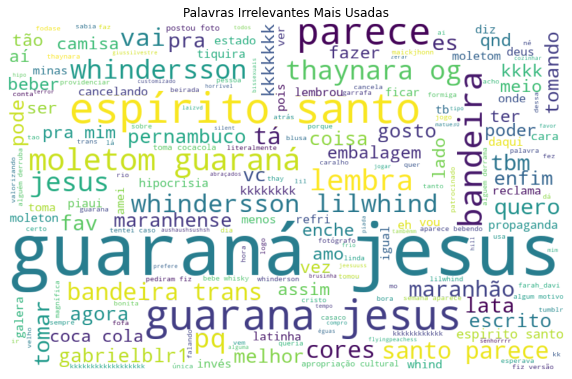

<Figure size 3600x2400 with 0 Axes>

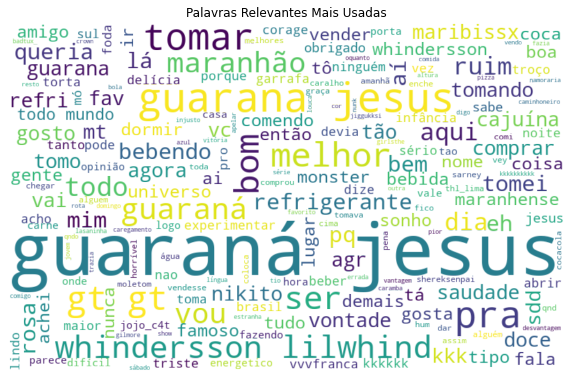

In [13]:
from wordcloud import WordCloud

irrelevant_words =' '.join([text for text in train['Pré Processado'][train['Classificação'] == 0]])
relevant_words =' '.join([text for text in train['Pré Processado'][train['Classificação'] == 1]])


wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(irrelevant_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Palavras Irrelevantes Mais Usadas")

plt.show()


wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(relevant_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Palavras Relevantes Mais Usadas")

plt.show()

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

Agora, faremos uso do banco de dados de teste para verificar a performance do nosso classificador. Antes, os dados serão passados por uma etapa de limpeza tal como feita com os dados de treino.

In [14]:
# Limpeza dos tweets dos dados de teste
def limpando(tweet):
    limpo = remove_stopwords(remove_outros_itens(clean_tweet(str(tweet))))
    return limpo

test_tweets = []
for tweet in test['Teste']:
    test_tweets.append(limpando(tweet))

# Cria coluna de pré processados nos dados de teste
series_test = pd.Series(test_tweets)
test['Pré Processado'] = series_test

In [15]:
def compara(frase):
    """
    Essa função determina a taxa relativa referente a cada palavra de uma frase
    para o cálculo da probabilidade condicional de Naive-Bayes, fazendo a
    comparação entre a probabilidade ser relevante ou irrelevante e retorna
    a reposta (relevante ou irrelevante) com base na desigualdade.
    """
    prob_serie_0 = 1
    prob_serie_1 = 1

    for palavra in frase:
        if (palavra not in probs[0].index):
            prob_serie_0 *= laplace(0, total_na_serie(series_tweets[0]), total)
        else: 
            prob_serie_0 *= probs[0][palavra]

    for palavra in frase:
        if (palavra not in probs[1].index):
            prob_serie_1 *= laplace(0, total_na_serie(series_tweets[1]), total) 
        else:
            prob_serie_1 *= probs[1][palavra]
            
    if prob_serie_0 > prob_serie_1:
        return 0
    else:
        return 1

In [16]:
# Chama função 'compara' e realiza a classificação do modelo
def conclusao(coluna_df, n):
    """
    Aplica função 'conclusão' para linha n da coluna do dataframe
    """
    return compara(coluna_df[n])

# Para cada tweet de teste, aplica o modelo e compara com o rótulo dado
classificacao_modelo = []
for i in range(0, len(test['Teste'])):
    classificacao_modelo.append(conclusao(test['Pré Processado'], i))

# Cria coluna nos dados de teste com os resultados
test["Naive Bayes"] = classificacao_modelo

# Exibe comparativo dos resultados do modelo com os rótulos (em porcentagem)
pd.crosstab(test['Classificação'], test['Naive Bayes'], normalize = True).round(4)*100

Naive Bayes,0,1
Classificação,,
0,37.89,14.29
1,11.80,36.02


Com o resultado acima, pode-se investigar um caso como: dado um tweet rotulado como relevante, qual a probabilidade dele ser classificado corretamente? Pensando nisso, foi determinado as probabilidades de acertos e erros para cada caso.

In [17]:
# Separa dados do teste conforme a classificação
serie_0_test = test[test["Classificação"] == 0]
serie_1_test = test[test["Classificação"] == 1]

# Valores iniciais das quantidades de cada caso
verdadeiros_positivos = 0
falsos_positivos = 0
verdadeiros_negativos = 0
falsos_negativos = 0

# Calcula a quantidade de tweets de cada um dos casos acima
for i in range(len(test['Classificação'])):
    if test['Classificação'][i] == 1 and test['Naive Bayes'][i] == 1:
        verdadeiros_positivos += 1
    elif test['Classificação'][i] == 0 and test['Naive Bayes'][i] == 1:
        falsos_positivos += 1
    elif test['Classificação'][i] == 0 and test['Naive Bayes'][i] == 0:
        verdadeiros_negativos += 1
    elif test['Classificação'][i] == 1 and test['Naive Bayes'][i] == 0:
        falsos_negativos += 1

# Retorna probabilidade para cada caso
print("Contagem\t\tProbabilidade")
print("----------------------------------------")
print("%s:\t\t%f" % ('Verdadeiros Positivos', verdadeiros_positivos/len(serie_1_test['Classificação'])))
print("%s:\t\t%f" % ('Falsos Positivos', falsos_positivos/len(serie_0_test['Classificação'])))
print("%s:\t\t%f" % ('Verdadeiros Negativos', verdadeiros_negativos/len(serie_0_test['Classificação'])))
print("%s:\t\t%f" % ('Falsos Negativos', falsos_negativos/len(serie_1_test['Classificação'])))

Contagem		Probabilidade
----------------------------------------
Verdadeiros Positivos:		0.753247
Falsos Positivos:		0.273810
Verdadeiros Negativos:		0.726190
Falsos Negativos:		0.246753


___
### Concluindo

De acordo com os resultados acima, pode-se ver que o modelo foi correspondente com os rótulos em quase 74% dos casos. Deve-se ter em que mente que esse resultado é uma combinação de diversos fatores (adotados ou não) na construção do modelo. Por ser um modelo baseado apenas em matemática, ele não leva em consideração, por exemplo, as situações de sacarmo ou ironia estabelecidas em um determinado contexto cultural com a combinação de determinadas palavras e emojis. Além disso, não estabelece relações de semântica e significado entre as palavras (por isso foram removidas as "stopwords"), sendo analisado apenas a frequência de cada palavra dentro de cada contexto de relevância.

___
### Por que não podemos usar  próprio classificador para gerar mais amostras?

Alguns pontos sobre o modelo precisam ser destacados para responder à pergunta:

- o modelo foi construindo em cima de ferramentas puramente matemáticas, isto é, não leva em conta aspectos humanos na classificação.
- o modelo pode estar repleto de viés de quem realizou as classificações inciais.
- não leva em conta os autores das postagens, seus perfis ou quaisquer fatores culturais.
- a base de dados não tem um tamanho tão expressivo.

Tendo isso em vista, o uso desse modelo na criação de novas amostras implicaria na geração de amostras cheias de viés dos criadores do modelo, resultando em uma acurácia de 100% quando testadas e recairia em um caso de overfitting - seria ineficaz na previsão de novos dados que não fossem gerados por ele.

___
### Cenários de aplicação do Classificador Naive-Bayes

Como foi visto, o classificador Naive-Bayes é um modelo baseado no cálculo de probabilidades envolvendo as palavras presentes nos tweets cuja classificação dos dados de treinamento são feitas manualmente. Assim como feito com os tweets nesse projeto, o classificador poderia ser usado, por exemplo, para filtrar posts do Facebook, textos de notícias ou sites que abordem, em geral, temas genéricos ou específicos que não adentrem questões mais sensíveis às pessoas. Por quê?

Como foi dito anteriormente, o classificador pode conter muito viés por parte de quem rotulou os dados de treinamento. Isso implica que o uso desse modelo em questões sensíveis como estudos políticos ou previsões de "chances de sobrevivência" em diagnósticos de doenças seria bastante arriscado, tanto para a classificação quanto para as consequências decorrentes de possíveis falhas na classificação.

Assim, em textos que tratam de esportes, por exemplo, o classificador pode ser interessante, já que há um certo vocabulário específico da área e não há tanta sensibilidade nesse tema como em muitos outros.

___
## Aperfeiçoamento:

### Como melhorar o modelo? 

Pode-se melhorar o desempenho do classificador com algumas práticas:

- **Aumentar o banco de dados de treinamento com mais tweets**<br>
Um maior banco de dados de treino dá ao modelo um maior arsenal de palavras, ocasionando uma melhor distribuição da influência de cada palavra nas tomadas de decisão do classificador. Isso seria feito modificando uma variável do código do buscador de tweets para buscar ainda mais tweets.

- **Implementação da técnica de cross-validation**<br>
Essa técnica, que pode ser entendida na plataforma da [Kaggle](https://www.kaggle.com/dansbecker/cross-validation), trata-se da prática de dividir os dados de treinamento em dataframes menores, a qual melhora a qualidade do modelo em termos de desempenho.

- **Variedade maior de pessoas que rotulam os dados de treino**<br>
Essa medida proporciona uma certa diluição do viés nas classificações iniciais com os diferentes pensamentos e decisões de cada pessoa participante, desde que estas sejam escolhidas de forma que abarquem uma maior variedade em termos de contexto social e cultural.

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**